# Census Report - Illinois

I will import the libraries needed to generate visualizations for spatial data

In [72]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

Next I will load the data file

In [73]:
inc = gpd.read_file('acs2019_5yr_B19001_05000US17181.geojson')

I will use a geojson file inorder to create spatial data

In [74]:
inc.shape

(104, 37)

There are 104 rows and 37 columns. I will now look at my data and clean it fro further use.

In [75]:
inc.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,01000US,United States,120756048.0,236892.0,7302871.0,18046.0,5189583.0,15224.0,5300624.0,15337.0,...,51444.0,11019036.0,49867.0,7267775.0,40108.0,8173563.0,49077.0,9264390.0,54033.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,04000US17,Illinois,4846134.0,10459.0,302966.0,3949.0,185043.0,2873.0,202275.0,3027.0,...,4983.0,464761.0,4697.0,313318.0,3840.0,360394.0,3979.0,401583.0,4359.0,"MULTIPOLYGON (((-91.18529 40.63780, -91.17510 ..."
2,05000US17001,"Adams County, IL",27112.0,358.0,1547.0,262.0,881.0,182.0,1692.0,263.0,...,326.0,2219.0,250.0,1203.0,210.0,1093.0,174.0,992.0,198.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
3,05000US17003,"Alexander County, IL",2154.0,161.0,240.0,70.0,169.0,63.0,149.0,53.0,...,60.0,52.0,31.0,44.0,27.0,56.0,36.0,9.0,11.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
4,05000US17005,"Bond County, IL",6299.0,360.0,467.0,145.0,277.0,116.0,358.0,133.0,...,176.0,634.0,144.0,306.0,85.0,280.0,85.0,207.0,81.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."


Next we will take a look at the data types using .info

In [76]:
inc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             104 non-null    object  
 1   name              104 non-null    object  
 2   B19001001         104 non-null    float64 
 3   B19001001, Error  104 non-null    float64 
 4   B19001002         104 non-null    float64 
 5   B19001002, Error  104 non-null    float64 
 6   B19001003         104 non-null    float64 
 7   B19001003, Error  104 non-null    float64 
 8   B19001004         104 non-null    float64 
 9   B19001004, Error  104 non-null    float64 
 10  B19001005         104 non-null    float64 
 11  B19001005, Error  104 non-null    float64 
 12  B19001006         104 non-null    float64 
 13  B19001006, Error  104 non-null    float64 
 14  B19001007         104 non-null    float64 
 15  B19001007, Error  104 non-null    float64 
 16  B19001008         

To understand the geo spatial aspect of this data we will use .plot to visualize the numerical values of the data set in a map like way

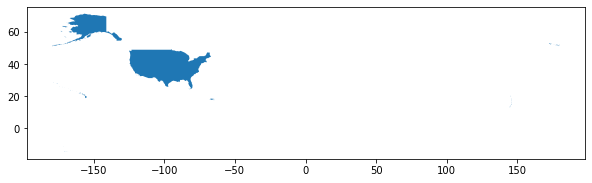

In [77]:
inc.plot(figsize=(10,20))

Now I will omit the first two rows of the data so I don't have any skewed data.

In [78]:
inc = inc.drop([0])
inc = inc.drop([1])
inc.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
2,05000US17001,"Adams County, IL",27112.0,358.0,1547.0,262.0,881.0,182.0,1692.0,263.0,...,326.0,2219.0,250.0,1203.0,210.0,1093.0,174.0,992.0,198.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
3,05000US17003,"Alexander County, IL",2154.0,161.0,240.0,70.0,169.0,63.0,149.0,53.0,...,60.0,52.0,31.0,44.0,27.0,56.0,36.0,9.0,11.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
4,05000US17005,"Bond County, IL",6299.0,360.0,467.0,145.0,277.0,116.0,358.0,133.0,...,176.0,634.0,144.0,306.0,85.0,280.0,85.0,207.0,81.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
5,05000US17007,"Boone County, IL",18571.0,424.0,703.0,234.0,621.0,187.0,531.0,162.0,...,292.0,1962.0,291.0,1441.0,316.0,1143.0,210.0,1356.0,258.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."
6,05000US17009,"Brown County, IL",2055.0,162.0,86.0,31.0,142.0,48.0,84.0,49.0,...,67.0,249.0,68.0,107.0,49.0,94.0,55.0,45.0,34.0,"MULTIPOLYGON (((-90.91469 40.01804, -90.91469 ..."


Now I can use the data without any enormous outliers

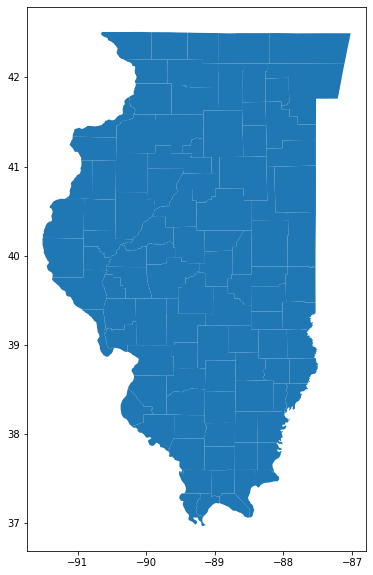

In [79]:
inc.plot(figsize=(10,10))

Now I will use techniques to change the numerical values of the spatial data into readable variables.

In [80]:
list(inc)

['geoid',
 'name',
 'B19001001',
 'B19001001, Error',
 'B19001002',
 'B19001002, Error',
 'B19001003',
 'B19001003, Error',
 'B19001004',
 'B19001004, Error',
 'B19001005',
 'B19001005, Error',
 'B19001006',
 'B19001006, Error',
 'B19001007',
 'B19001007, Error',
 'B19001008',
 'B19001008, Error',
 'B19001009',
 'B19001009, Error',
 'B19001010',
 'B19001010, Error',
 'B19001011',
 'B19001011, Error',
 'B19001012',
 'B19001012, Error',
 'B19001013',
 'B19001013, Error',
 'B19001014',
 'B19001014, Error',
 'B19001015',
 'B19001015, Error',
 'B19001016',
 'B19001016, Error',
 'B19001017',
 'B19001017, Error',
 'geometry']

Using the list function I will be able to change the numbers into strings/words

In [81]:
columns_to_keep = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [82]:
inc = inc[columns_to_keep]

Now I will use .columns to create a list of names for the columns that correspond to the original data chart using the metadata.json file

In [83]:
inc.columns = ['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '10,000 to $14,999',
 '15,000 to $19,999',
 '20,000 to $24,999',
 '25,000 to $29,999',
 '30,000 to $34,999',
 '35,000 to $39,999',
 '40,000 to $44,999',
 '45,000 to $49,999',
 '50,000 to $59,999',
 '60,000 to $74,999',
 '75,000 to $99,999',
 '100,000 to $124,999',
 '$125,000 to $149,999',
 '150,000 to $199,999',
 '$200,000 or more',
 'geometry']

Now I will check to see if the column labels changed accordingly.

In [84]:
inc.head()

,geoid,name,Total,"Less than $10,000","10,000 to $14,999","15,000 to $19,999","20,000 to $24,999","25,000 to $29,999","30,000 to $34,999","35,000 to $39,999","40,000 to $44,999","45,000 to $49,999","50,000 to $59,999","60,000 to $74,999","75,000 to $99,999","100,000 to $124,999","$125,000 to $149,999","150,000 to $199,999","$200,000 or more",geometry
2,05000US17001,"Adams County, IL",27112.0,1547.0,881.0,1692.0,1276.0,1518.0,1511.0,1674.0,1331.0,1188.0,2446.0,2965.0,3576.0,2219.0,1203.0,1093.0,992.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
3,05000US17003,"Alexander County, IL",2154.0,240.0,169.0,149.0,182.0,166.0,119.0,131.0,142.0,94.0,255.0,144.0,202.0,52.0,44.0,56.0,9.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
4,05000US17005,"Bond County, IL",6299.0,467.0,277.0,358.0,298.0,232.0,178.0,279.0,262.0,332.0,579.0,569.0,1041.0,634.0,306.0,280.0,207.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
5,05000US17007,"Boone County, IL",18571.0,703.0,621.0,531.0,988.0,857.0,975.0,592.0,708.0,662.0,1505.0,2093.0,2434.0,1962.0,1441.0,1143.0,1356.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."
6,05000US17009,"Brown County, IL",2055.0,86.0,142.0,84.0,135.0,82.0,47.0,96.0,89.0,47.0,150.0,286.0,316.0,249.0,107.0,94.0,45.0,"MULTIPOLYGON (((-90.91469 40.01804, -90.91469 ..."


With the new data labels, I can use the Total column to find the mean and median.

In [85]:
inc['Total'].mean()

47511.117647058825

In [86]:
inc['Total'].median()

10384.5

I will now plot the number of total income of people in illinois on a histogram, I adjusted the number of bins inorder to make the bars more legible

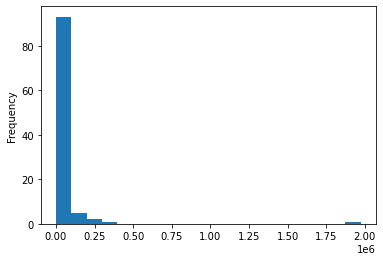

In [87]:
inc['Total'].plot.hist(bins=20)

I will now over lap the highest and lowest income ranges to see the discrepancies using similar code to the two columned maps

Text(0.5, 1.0, 'orange = 200,000 or more dollars, blue = Less than 10,000 dollars')

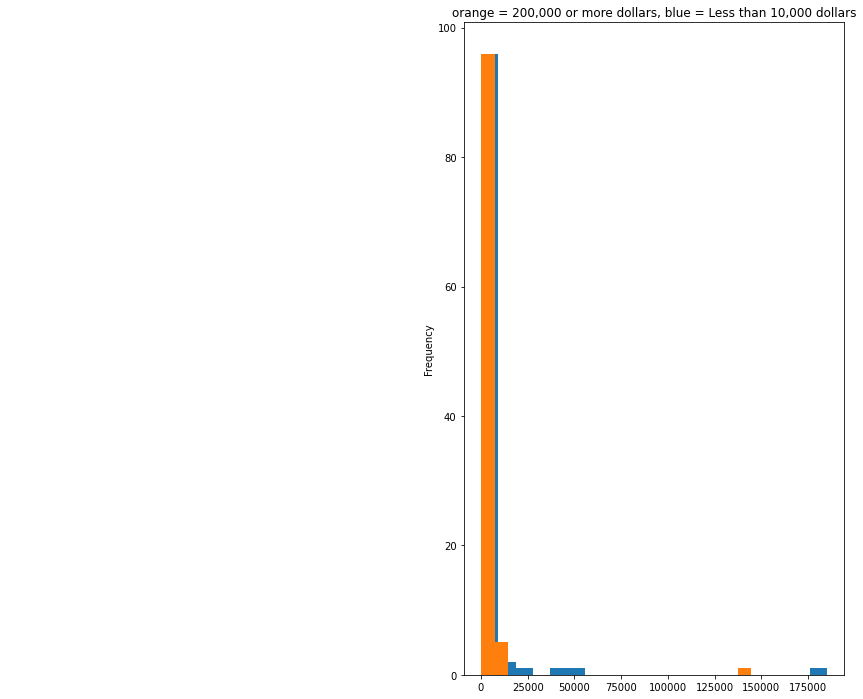

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs

inc['$200,000 or more'].plot.hist(bins=20)

inc['Less than $10,000'].plot.hist(bins=20)
ax1.axis("off")


ax2.axis("on")
ax2.set_title("orange = 200,000 or more dollars, blue = Less than 10,000 dollars")

Now I will represent the percentages by the variables I created above

In [89]:
inc['Percent Less than $10,000'] = inc['Less than $10,000']/inc['Total']*100
inc['Percent 10,000 to $14,999'] = inc['10,000 to $14,999']/inc['Total']*100
inc['Percent 15,000 to $19,999'] = inc['15,000 to $19,999']/inc['Total']*100
inc['Percent 20,000 to $24,999'] = inc['20,000 to $24,999']/inc['Total']*100 
inc['Percent 30,000 to $34,999'] = inc['30,000 to $34,999']/inc['Total']*100
inc['Percent 35,000 to $39,999'] = inc['35,000 to $39,999']/inc['Total']*100
inc['Percent 40,000 to $44,999'] = inc['40,000 to $44,999']/inc['Total']*100 
inc['Percent 45,000 to $49,999'] = inc['45,000 to $49,999']/inc['Total']*100
inc['Percent 50,000 to $59,999'] = inc['50,000 to $59,999']/inc['Total']*100
inc['Percent 60,000 to $74,999'] = inc['60,000 to $74,999']/inc['Total']*100
inc['Percent 75,000 to $99,999'] = inc['75,000 to $99,999']/inc['Total']*100 
inc['Percent 100,000 to $124,999'] = inc['100,000 to $124,999']/inc['Total']*100
inc['Percent $125,000 to $149,999'] = inc['$125,000 to $149,999']/inc['Total']*100 
inc['Percent 150,000 to $199,999'] = inc['150,000 to $199,999']/inc['Total']*100
inc['Percent $200,000 or more'] = inc['$200,000 or more']/inc['Total']*100 

This map shows percentage of total income of people in each county, in which you can see a massive discrepancy.

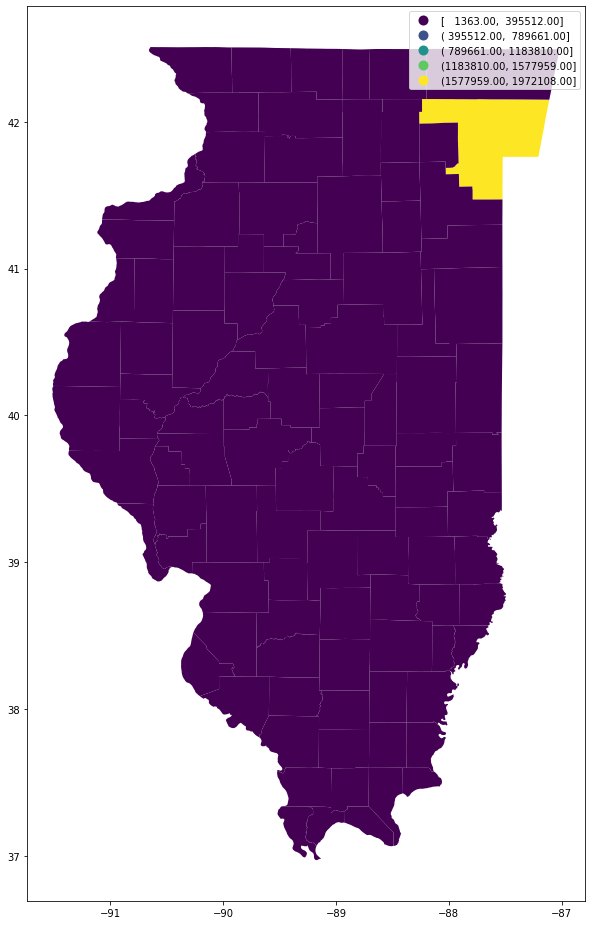

In [90]:
inc.plot(figsize=(10,30),
                 column='Total',
                 legend=True, 
                 scheme='equal_interval')

I will now create a maps side by side that compare the lowest and highest incomes by county.

Text(0.5, 1.0, 'Percent $200,000 or more')

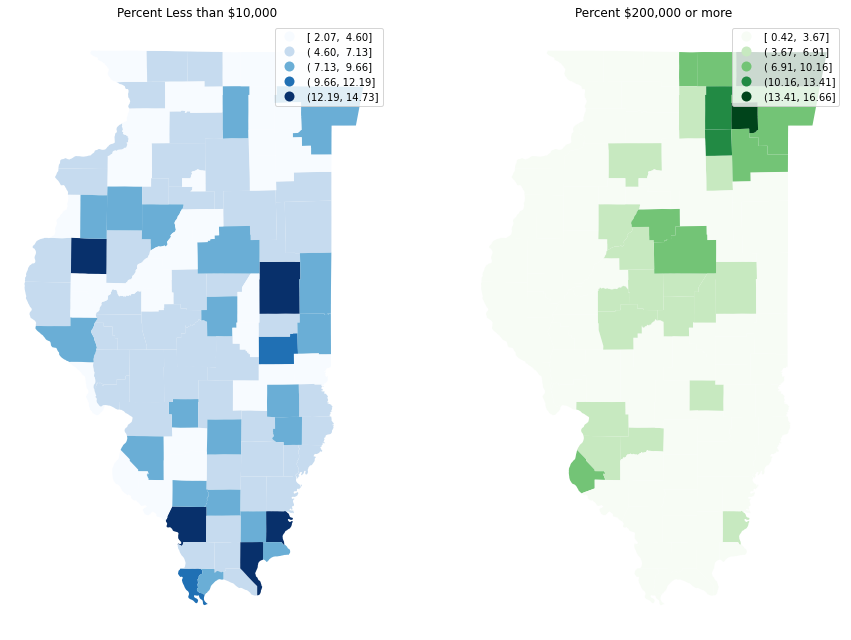

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs

inc.plot(column='Percent Less than $10,000', 
         
            cmap= 'Blues', 
            scheme='equal_interval',
            k=5, 
            edgecolor='blue', 
            linewidth=0., 
            alpha=1, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Less than $10,000")

inc.plot(column='Percent $200,000 or more', 
            cmap= 'Greens', 
            scheme='equal_interval',
            k=5, 
            edgecolor='blue', 
            linewidth=0., 
            alpha=1, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent $200,000 or more")

Now I will quickplot a close up map of Chicago, the highest populous city in Illinois.

In [92]:
address = 'Chicago, IL'
tags = {'building':True}
dist = 1000 

In [93]:
%%time
osm = ox.geometries_from_address(address,
                                 tags=tags,
                                 dist=dist)

CPU times: user 326 ms, sys: 17.3 ms, total: 344 ms
Wall time: 4.93 s


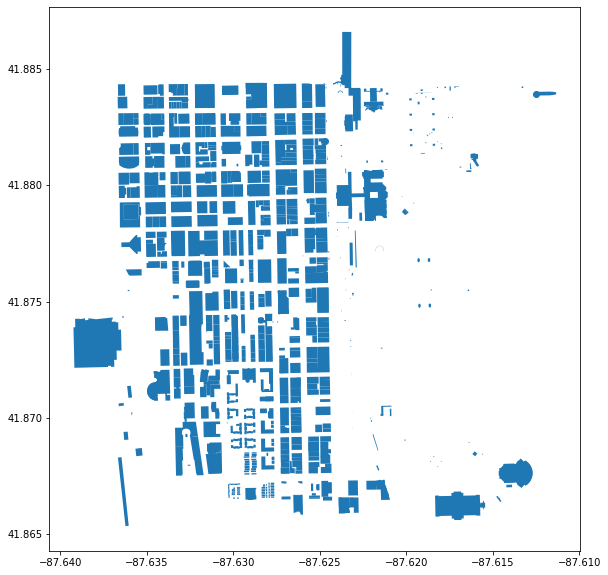

In [94]:
osm.plot(figsize=(10,10))